In [4]:
import tweepy
  
# assign the values accordingly
consumer_key = ""
consumer_secret= ""
access_token=""
access_token_secret=""
  
# authorization of consumer key and consumer secret
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
  
# set access to user's access key and access secret 
auth.set_access_token(access_token, access_token_secret)
  
# calling the api 
api = tweepy.API(auth)

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [13]:
train_df = pd.read_csv('nodos25n.csv')
train_df.count()


source_user    550
source         550
target         550
target_user    550
dtype: int64

In [18]:
train_df.head()

,source_user,source,target,target_user
0,ONU Mujeres Ecuador,1465787970414419976,2407694894,BuddiLi
1,Ministerio del Deporte Ecuador,1465777282207866887,1041449741807218688,fenuso1
2,ONU Mujeres Ecuador,1465776423491321868,180801127,catheat24
3,ONU Mujeres Ecuador,1465776423491321868,821739076722237442,samanescuatro
4,Aldeas SOS Ecuador,1465770891682398215,308481591,lau_muriel


In [14]:
tweets=[]
df = pd.DataFrame(tweets, columns = ['source' , 'target', 'target_user'])
cont=0

In [28]:

for i in train_df['id']:
    #print(f"id: {i}")
    if cont >74:
        retweets_list = api.retweets(i)
        for retweet in retweets_list:
            df=df.append({'source' : i , 'target' : retweet.user.id, 'target_user' : retweet.user.screen_name} , ignore_index=True)
    cont+=1

RateLimitError: [{'message': 'Rate limit exceeded', 'code': 88}]

In [29]:
df

,source,target,target_user
0,1465787970414419976,2407694894,BuddiLi
1,1465777282207866887,1041449741807218688,fenuso1
2,1465776423491321868,180801127,catheat24
3,1465776423491321868,821739076722237442,samanescuatro
4,1465770891682398215,308481591,lau_muriel
...,...,...,...
300,1465449923495792644,142498934,amodeltiempo
301,1465449923495792644,234938089,AZULVIRVIESCAS
302,1465449923495792644,705986347203469312,AlvaroArtD
303,1465449923495792644,128339726,lida30


In [129]:
output = []
tweets = api.user_timeline(screen_name="DinaErcilia", 
                           # 200 is the maximum allowed count
                           count=200,
                           include_rts = False,
                           #Necessary to keep full_text 
                           #otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )

for info in tweets:
    #print("ID: {}".format(info.id))
    #print(info.created_at)
    #print(info.full_text)
    #print("\n")
    text = info.full_text

    line = {'id':info.id, 'date':info.created_at ,'tweet' : text}
    output.append(line)
    print(line)

{'id': 1469318006870183936, 'date': datetime.datetime(2021, 12, 10, 14, 48, 6), 'tweet': 'Los #derechoshumanos son de toda la humanidad pero no la totalidad de nuestros compatriotas gozan plenamente de sus derechos fundamentales. Ratificamos nuestro empeño de erradicar el hambre y garantizar la #inclusión como parte de la lucha desde el gobierno para garantizarlos. https://t.co/LOcszrv7lH'}
{'id': 1469025478166126592, 'date': datetime.datetime(2021, 12, 9, 19, 25, 41), 'tweet': 'Al conmemorarse el 197° Aniversario de la Batalla de Ayacucho y Día del @EjercitoPeru saludamos afectuosamente a esta gran institución y sus integrantes en todo el país. https://t.co/JQaZEuuNVs'}
{'id': 1468644242696331264, 'date': datetime.datetime(2021, 12, 8, 18, 10, 48), 'tweet': 'Expreso mis condolencias a la familia de la excongresista Susana Higuchi Miyagawa, fallecida hoy. Recordaremos siempre su gran papel como Primera Dama, su trayectoria política limpia y calidad humana que son de reconocimiento unán

In [160]:
id = "1463876796257079296"
tweets=[]
df = pd.DataFrame(tweets, columns = ['source' , 'target', 'target_user'])
retweets_list = api.retweets(id)
for retweet in retweets_list:
        #print(retweet.user.screen_name)
        #print(retweet.user.id)
    df=df.append({'source' : id , 'target' : retweet.user.id, 'target_user' : retweet.user.screen_name} , ignore_index=True)
df.count()

source         20
target         20
target_user    20
dtype: int64

In [131]:
d=[]
porsiaca = df
df_c = pd.DataFrame(d, columns = ['source_user','source' , 'target', 'target_user']) #completo con los name user
for i in df.index:
    tweet = api.get_status(df['source'][i])
    #print(tweet.user.name)
    user = tweet.user.name
    df_c=df_c.append({'source_user':user,'source' : df['source'][i] , 'target' : df['target'][i], 'target_user' : df['target_user'][i]} , ignore_index=True)

In [132]:
df_c.head(500)
train_df = train_df.append(df_c)

In [133]:
train_df.head(800)

,source_user,source,target,target_user
0,ONU Mujeres Ecuador,1465787970414419976,2407694894,BuddiLi
1,Ministerio del Deporte Ecuador,1465777282207866887,1041449741807218688,fenuso1
2,ONU Mujeres Ecuador,1465776423491321868,180801127,catheat24
3,ONU Mujeres Ecuador,1465776423491321868,821739076722237442,samanescuatro
4,Aldeas SOS Ecuador,1465770891682398215,308481591,lau_muriel
...,...,...,...,...
6,Anahi Durand,1464055238369841152,2781383187,oclaros06
7,Anahi Durand,1464055238369841152,1357589945536364544,MaleCanta_
8,Anahi Durand,1464055238369841152,57529156,rclaros2
9,Anahi Durand,1464055238369841152,158120967,Shavua_tov


In [139]:
train_df.to_csv('nodos25n_of.csv',index=False)

In [140]:
import csv
from tqdm import tqdm
import networkx as nx

In [141]:
G = nx.DiGraph()

In [143]:
train_df.count()

source_user    847
source         847
target         847
target_user    847
dtype: int64

In [180]:
#with open('./data/hero-network.csv', 'r') as f:
with open('nodos25n_of.csv', 'r', encoding="utf8") as f:
    data = csv.reader(f)
    headers = next(data)
    for row in tqdm(data):
        G.add_node(row[0]) #superhero in first column
        G.add_node(row[3]) #superhero in second column
        if G.has_edge(row[0], row[3]):
            # edge already exists, increase weight by one
            G[row[0]][row[3]]['weight'] += 1
        else:
            # add new edge with weight 1
            G.add_edge(row[0], row[3], weight = 1)
    
    
    """ G.add_node(train_df['source_user'][i]) #superhero in first column
    G.add_node(train_df['target_user'][i]) #superhero in second column
    print(f"{train_df['source_user'][i]},{train_df['target_user'][i]}")
    if G.has_edge(train_df['source_user'][i], train_df['target_user'][i]):
        # edge already exists, increase weight by one
        G[train_df['source_user'][i]][train_df['target_user'][i]]['weight'] += 1
    else:
            # add new edge with weight 1
        G.add_edge(train_df['source_user'][i], train_df['target_user'][i], weight = 1)"""

847it [00:00, 48616.80it/s]


In [181]:
G_nodes = G.number_of_nodes()
G_edges = G.number_of_edges()
print("Nodes = ", G_nodes, " Edges = ",G_edges)



Nodes =  492  Edges =  481


In [182]:
nx.write_gexf(G, "25n-network.gexf")

In [183]:
G_density = nx.density(G)
print("density = ",G_density)

density =  0.001991124799231699


# degree

In [184]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G,degree_dict,'degree')

In [185]:
import operator
sorted_degree = sorted(degree_dict.items(), key=operator.itemgetter(1), reverse=True)
print("Los 10 nodos mas relevantes por Grado (personas con mas conexiones en la red social) son: ")
for d in sorted_degree[:10]:
    print(d)
    

Los 10 nodos mas relevantes por Grado (personas con mas conexiones en la red social) son: 
('Mirtha Vásquez', 40)
('Anahi Durand', 37)
('Sigrid Bazán', 33)
('Maricarmen Alva', 25)
('Susel Paredes', 21)
('Gloria Montenegro', 20)
('Martha Moyano Delgado', 20)
('Dina Boluarte Z.', 20)
('Flor Pablo Medina 🇵🇪', 19)
('RocioSilvaSantisteban', 19)


In [120]:
pip install -U networkx

  Attempting uninstall: networkx
    Found existing installation: networkx 2.3
    Uninstalling networkx-2.3:
      Successfully uninstalled networkx-2.3
Note: you may need to restart the kernel to use updated packages.


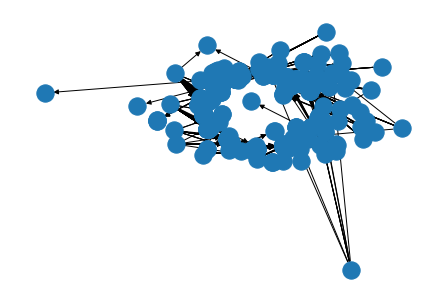

In [107]:
nx.draw_kamada_kawai(G)

In [135]:
pip install pyvis

Note: you may need to restart the kernel to use updated packages.


In [108]:
from pyvis.network import Network
net = Network(notebook=True)
net.from_nx(G)
net.show("example.html")

# centralidad betweeness 

In [102]:
!pip install decorator==4.3

!pip install networkx==2.3